In [105]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam,norm
from scipy.optimize import minimize

In [97]:
df = pd.read_csv("./epl20192020_formated.csv")

In [98]:
df.head()

,Unnamed: 0,domacini,gosti,isHome,players,positions,scores
0,h_player_01,Liverpool,Norwich City,yes,Alisson,G,6.9
1,h_player_02,West Ham United,Manchester City,yes,Łukasz Fabiański,G,5.8
2,h_player_03,Bournemouth,Sheffield United,yes,Aaron Ramsdale,G,6.6
3,h_player_04,Watford,Brighton & Hove Albion,yes,Ben Foster,G,5.5
4,h_player_05,Burnley,Southampton,yes,Nick Pope,G,7.6


,Unnamed: 0,domacini,gosti,isHome,players,positions,scores
5031,a_player_1116,Brighton & Hove Albion,West Ham United,no,Łukasz Fabiański,G,6.8
56,h_player_057,West Ham United,Manchester United,yes,Łukasz Fabiański,G,7.5
427,h_player_0428,West Ham United,Manchester City,yes,Łukasz Fabiański,G,7.5
5455,a_player_11440,Liverpool,West Ham United,no,Łukasz Fabiański,G,6.6
5354,a_player_11339,Norwich City,West Ham United,no,Łukasz Fabiański,G,7.6
...,...,...,...,...,...,...,...
5203,a_player_11188,Wolverhampton,Manchester City,no,Ederson,G,3.0
3524,h_player_7333,Manchester City,Newcastle United,yes,David Silva,M,9.9
6617,a_player_14234,Chelsea,Arsenal,no,David Luiz,D,3.7
5068,a_player_1153,Manchester City,Watford,no,Ben Foster,G,3.9


In [108]:
df_agg

,scores
players,
Aaron Connolly,115.2
Aaron Cresswell,266.9
Aaron Lennon,25.7
Aaron Mooy,173.0
Aaron Ramsdale,310.2
...,...
Érik Lamela,97.8
Étienne Capoue,206.5
Ørjan Nyland,32.1


In [104]:
def glm_model(df, pval=0.05):
    


    # reformat dataframe for the model
    goal_model_data = df

    # build poisson model
    model = smf.glm(formula="scores ~ players + isHome + gosti+ domacini + positions", data=goal_model_data, 
                            family=sm.families.Gaussian()).fit()
    # output model parameters
    model.summary()
    
    return model

In [102]:
model = glm_model(df)

In [103]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 scores   No. Observations:                10032
Model:                            GLM   Df Residuals:                     9418
Model Family:                Gaussian   Df Model:                          613
Link Function:               identity   Scale:                         0.31687
Method:                          IRLS   Log-Likelihood:                -8153.4
Date:                Sun, 15 Nov 2020   Deviance:                       2984.3
Time:                        18:29:11   Pearson chi2:                 2.98e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                6.5174      0.157     41.641      0.000       6.211       6.824
players[T.Aaron Cresswell]               0.2127      0.175      1.215      0.225      -0.131       0.556
players[T.Aaron Lennon]                 -0.1362      0.316     -0.431      0.667      -0.756       0.484
players[T.Aaron Mooy]                    0.2536      0.179      1.413      0.158      -0.098       0.605
players[T.Aaron Ramsdale]                0.1079      0.094      1.144      0.253      -0.077       0.293
players[T.Aaron Wan-Bissaka]             0.4848      0.173      2.804      0.005       0.146       0.824
players[T.Abdoulaye Doucouré]            0.1252      0.168      0.746      0.456      -0.204       0.454
players[T.Aboubakar Kamara]             -0.8417      0.428     -1.964      0.049      -1.681      -0.002
players[T.Adam Idah]                    -0.4504      0.581     -0.775      0.439      -1.590       0.689
players[T.Adam Lallana]                  0.0831      0.234      0.356      0.722      -0.375       0.541
players[T.Adam Masina]                   0.0415      0.196      0.211      0.833      -0.343       0.426
players[T.Adam Smith]                   -0.2549      0.189     -1.351      0.177      -0.625       0.115
players[T.Adam Webster]                  0.2176      0.172      1.269      0.205      -0.119       0.554
players[T.Adama Traoré]                  0.7529      0.175      4.303      0.000       0.410       1.096
players[T.Ademola Lookman]               0.1821      0.322      0.566      0.571      -0.449       0.813
players[T.Adrian Mariappa]              -0.2531      0.209     -1.210      0.226      -0.663       0.157
players[T.Adrián]                       -0.0799      0.173     -0.462      0.644      -0.419       0.259
players[T.Ahmed El-Mohamady]             0.1955      0.226      0.866      0.387      -0.247       0.638
players[T.Ahmed Hegazy]                  0.0419      0.587      0.071      0.943      -1.109       1.193
players[T.Ainsley Maitland-Niles]        0.0706      0.202      0.349      0.727      -0.326       0.467
players[T.Aleksandar Mitrović]           0.1449      0.262      0.553      0.580      -0.369       0.659
players[T.Alex Iwobi]                    0.0829      0.191      0.434      0.664      -0.291       0.457
players[T.Alex McCarthy]                 0.1843      0.103      1.784      0.074      -0.018       0.387
players[T.Alex Oxlade-Chamberlain]       0.3980      0.197      2.017      0.044       0.011       0.785
players[T.Alexander Tettey]             -0.1255      0.180     -0.699      0.485      -0.477       0.226
players[T.Alexandre Lacazette]           0.2974      0.176      1.685      0.092      -0.049       0.643
players[T.Alexis Mac Allister]        

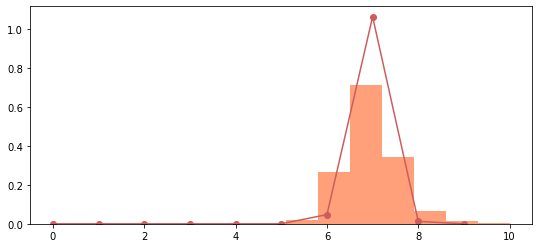

In [43]:
poisson_pred = np.array([norm.pdf(i, df.scores.mean(),df.scores.var()) for i in range(10)] )

fig, ax = plt.subplots(figsize=(9,4))  
# plot histogram of actual goals
plt.hist(df.scores.values, color=["#FFA07A"],density=True)

pois1, = plt.plot([i for i in range(0,10)], poisson_pred,
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')

In [49]:
def simulate_score(model,isHome="yes", homeTeam="Chelsea", awayTeam="Arsenal",player="Timo Werner",position="F"):
    home_goals_avg = model.predict(pd.DataFrame(data={"players":player,
                                                      "isHome":isHome,
                                                      "gosti":awayTeam,
                                                      "domacini":homeTeam,
                                                      "positions":position},index=[1]))
    
    return home_goals_avg

In [50]:
simulate_score(model,isHome="yes", homeTeam="Chelsea", awayTeam="Arsenal",player="Timo Werner",position="F")

1    7.198539
dtype: float64

In [11]:
from bs4 import BeautifulSoup

In [8]:
from selenium import webdriver
from bs4 import BeautifulSoup
driver = webdriver.Chrome('C:/chromedriver/chromedriver')

In [10]:
driver.get("https://www.sofascore.com/hr/turnir/nogomet/england/premier-league/17")

In [87]:
def edit_scores():
    html = driver.page_source
    soup = BeautifulSoup(html)
    
    all_players = [x.text for x in soup.find_all("div",{"class":"Playerstyles__Name-sc-1qy7rd4-7 iqVytb"})]
    all_players = [x if "(c)" not in x else x[4:] for x in all_players ]
    domacin,gost = soup.find("a",{"class":"styles__EventLink-d389b-0 koniBB"}).text.split(" - ")
    
    game_df = []
    for isHome,player in enumerate(all_players):
        player = player.replace("\'","")
        temp = []
        temp+=[domacin,gost]
        if isHome<11:
            temp.append("yes")
        else:
            temp.append("no")
        temp.append(player)
        try:
            position = df[df.players==player].positions.value_counts().index[0]
        except:
            print("Nema pozicije za ",player)
            position = "F"
        temp.append(position)
        game_df.append(temp)

    game_df = pd.DataFrame(game_df)
    game_df.columns = (["domacini","gosti","isHome","players","positions"])
    
    for i,player_data in game_df.iterrows():
        
        predicted_score = simulate_score(model,
                       isHome=player_data.isHome, 
                       homeTeam=player_data.domacini, 
                       awayTeam=player_data.gosti,
                       player=player_data.players,
                       position=player_data.positions)
        predicted_score = round(predicted_score[1],1)
        script = """document.getElementsByClassName("Playerstyles__PlayerWrapper-sc-1qy7rd4-0 ikkgcq")["""+str(i)+"""].children[3].innerText="""+str(predicted_score)
        driver.execute_script(script)
        print(player_data.players, predicted_score)

In [111]:
edit_scores()

Kasper Schmeichel 6.9
Wesley Fofana 7.1
Jonny Evans 6.9
Christian Fuchs 6.8
James Justin 6.9
Youri Tielemans 7.1
Nampalys Mendy 6.8
Luke Thomas 6.8
Dennis Praet 6.7
James Maddison 7.3
Jamie Vardy 7.2
Rui Patrício 6.7
Willy Boly 6.9
Conor Coady 6.7
Max Kilman 6.8
Nélson Semedo 6.9
Leander Dendoncker 6.7
Rúben Neves 6.9
Rayan Aït Nouri 6.6
Pedro Neto 6.9
Daniel Podence 7.0
Raúl Jiménez 7.0


In [62]:
#document.getElementsByClassName("Playerstyles__PlayerWrapper-sc-1qy7rd4-0 ikkgcq")[1].appendChild(test)
#dodavanje oznake

In [64]:

game_df

,domacini,gosti,isHome,players,positions
0,Manchester City,Liverpool,yes,Ederson,G
1,Manchester City,Liverpool,yes,Kyle Walker,D
2,Manchester City,Liverpool,yes,Rúben Dias,D
3,Manchester City,Liverpool,yes,Aymeric Laporte,D
4,Manchester City,Liverpool,yes,João Cancelo,D
5,Manchester City,Liverpool,yes,Rodri,M
6,Manchester City,Liverpool,yes,İlkay Gündoğan,M
7,Manchester City,Liverpool,yes,Ferrán Torres,F
8,Manchester City,Liverpool,yes,Kevin De Bruyne,M
9,Manchester City,Liverpool,yes,Raheem Sterling,F


Ederson 6.6
Kyle Walker 6.8
Rúben Dias 7.0
Aymeric Laporte 6.9
João Cancelo 7.2
Rodri 7.1
İlkay Gündoğan 7.0
Ferrán Torres 6.5
Kevin De Bruyne 7.9
Raheem Sterling 7.1
Gabriel Jesus 7.1
Alisson 6.6
Trent Alexander-Arnold 7.1
Joël Matip 6.9
Joe Gomez 6.6
Andrew Robertson 6.8
Jordan Henderson 7.0
Georginio Wijnaldum 6.5
Diogo Jota 6.5
Roberto Firmino 6.8
Sadio Mané 7.1
Mohamed Salah 7.2


In [67]:
df[df.players=="Willian"]

,Unnamed: 0,domacini,gosti,isHome,players,positions,scores
3379,h_player_7188,Chelsea,Crystal Palace,yes,Willian,M,8.0
3410,h_player_7219,Chelsea,Aston Villa,yes,Willian,M,8.3
3659,h_player_812,Arsenal,West Ham United,yes,Willian,F,7.0
3683,h_player_836,Arsenal,Sheffield United,yes,Willian,F,7.0
3725,h_player_878,Arsenal,Aston Villa,yes,Willian,F,7.1
3785,h_player_8138,Chelsea,Liverpool,yes,Willian,F,7.0
3807,h_player_8160,Chelsea,Newcastle United,yes,Willian,F,7.8
3888,h_player_8241,Chelsea,Bournemouth,yes,Willian,F,7.3
4011,h_player_8364,Chelsea,Everton,yes,Willian,F,8.8
4033,h_player_8386,Chelsea,Manchester City,yes,Willian,F,7.5


In [38]:
soup.find("a",{"class":"styles__EventLink-d389b-0 koniBB"}).text.split(" - ")

['Arsenal', 'Aston Villa']